In [1]:
# link to github https://github.com/anwarren1728/NeVSample/blob/main/StartingBPT2.ipynb

In [2]:
import pandas as pd
import numpy as np 
from astropy.io import fits
import matplotlib.pyplot as plt

In [3]:
hdu = fits.open('/Volumes/quinn_casey/eboss/dr16_eboss_simplefit_v1.fit')

In [5]:
n2 = hdu[1].data['NII_6584_FLUX'].tolist()
n2_err = hdu[1].data['NII_6584_FLUX_ERR'].tolist()
ha = hdu[1].data['H_ALPHA_FLUX'].tolist()
ha_err = hdu[1].data['H_ALPHA_FLUX_ERR'].tolist()
o3 = hdu[1].data['OIII_5007_FLUX'].tolist()
o3_err = hdu[1].data['OIII_5007_FLUX_ERR'].tolist()
hb = hdu[1].data['H_BETA_FLUX'].tolist()
hb_err = hdu[1].data['H_BETA_FLUX_err'].tolist()
nev = hdu[1].data['NEV_3426_FLUX'].tolist()
nev_err = hdu[1].data['NEV_3426_FLUX_ERR'].tolist()
nev_ew = hdu[1].data['NEV_3426_EW'].tolist()
z = hdu[1].data['Z'].tolist()

In [6]:
data_df = {'n2':n2, 'n2_err':n2_err, 
          'ha':ha, 'ha_err':ha_err, 
          'o3':o3, 'o3_err':o3_err, 
          'hb':hb, 'hb_err':hb_err, 
          'nev':nev, 'nev_err':nev_err, 'nev_ew':nev_ew, 
          'z':z}

df = pd.DataFrame(data_df)

In [7]:
#OIIIFIX = np.where((OIII > 3*OIIIerr) & (NII > 3*NIIerr))

df = df.where((df.o3 > 3*(df.o3_err)) & (df.n2 > 3*(df.n2_err)))

In [9]:
df['x'] = np.log10(df['n2']/df['ha'])
df['y'] = np.log10(df['o3']/df['hb'])

/Users/quinncasey/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [10]:
X = np.linspace(-1.8,.45)
XII = np.linspace(-1.8,-0.18)
Y = (0.61/(X - 0.47) + 1.3)
YII = (0.61/(XII - 0.05) + 1.19)

Text(0.5, 1.0, 'BPT Diagram')

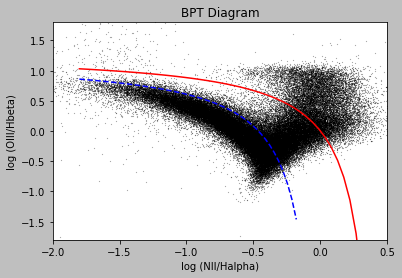

In [12]:
plt.style.use('grayscale')
plt.figure()

plt.plot(df['x'], df['y'],'.',color='black', markersize=.25)
plt.plot(X,Y,'-',color = 'red')
plt.plot(XII,YII,'--',color = 'blue')
plt.xlim([-2,.5])
plt.ylim([-1.8,1.8])

plt.xlabel('log (NII/Halpha)')
plt.ylabel('log (OIII/Hbeta)')
plt.title('BPT Diagram')

In [14]:
# df is still in original format, make a copy I can revert back to
df1 = df.copy()

In [16]:
# NEVFIX = np.where((NEV > 3*NEVerr) & (OIII > 3*OIIIerr) & (NII > 3*NIIerr) & (Z > .05) & (NEVew > 1) & (NEVerr != 0))
df1 = df1.where( (df1.nev > 3*df1.nev_err) & (df1.o3 > 3*df1.o3_err) & (df1.n2 > 3*df1.n2_err) & (df1.z > 0.05) & (df1.nev_ew > 1) & (df1.nev_err != 0)  )

Text(0.5, 1.0, 'BPT Diagram')

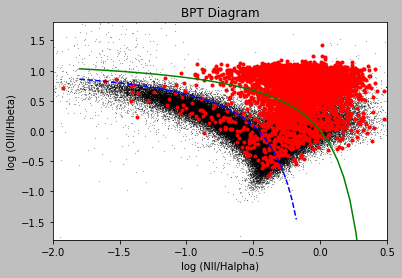

In [19]:
plt.style.use('grayscale')
plt.figure()

plt.plot(df['x'], df['y'],'.',color='black', markersize=.25)
plt.plot(df1['x'], df1['y'],'.',color='red')
plt.plot(X,Y,'-',color = 'green')
plt.plot(XII,YII,'--',color = 'blue')
plt.xlim([-2,.5])
plt.ylim([-1.8,1.8])

plt.xlabel('log (NII/Halpha)')
plt.ylabel('log (OIII/Hbeta)')
plt.title('BPT Diagram')

In [27]:
# make another df cause why not 
df2 = df1.copy()
df3 = df.copy()

In [28]:
# OIIIFIXBLUE = np.where(((((0.61)/(NIINEW - 0.05)) + 1.19) > (OIIINEW)) & (NIINEW < .05))
# OIIIFIXBLUE2 = np.where(((((0.61)/(NIIPLOT2 - 0.05)) + 1.19) > (OIIIPLOT2)) & (NIIPLOT2 < .05))
# 'NIINEW' is data from df
# 'NIIPLOT2' is data from df1

df3 = df3.where(((((0.61)/(df3.x - 0.05)) + 1.19) > (df3.y)) & (df3.x < .05))
df2 = df2.where(((((0.61)/(df2.x - 0.05)) + 1.19) > (df2.y)) & (df2.x < .05))

Text(0.5, 1.0, 'BPT Diagram')

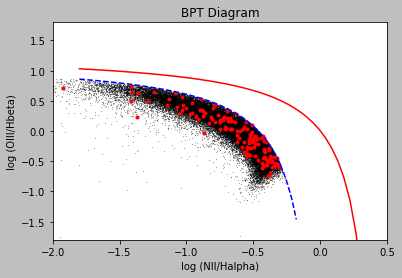

In [29]:
plt.figure()

plt.plot(df3['x'], df3['y'],'.',color='black', markersize=.25)
plt.plot(df2['x'],df2['y'],'.',color = 'red')
plt.plot(X,Y,'-',color = 'red')
plt.plot(XII,YII,'--',color = 'blue')
plt.xlim([-2,.5])
plt.ylim([-1.8,1.8])

plt.xlabel('log (NII/Halpha)')
plt.ylabel('log (OIII/Hbeta)')
plt.title('BPT Diagram')

In [26]:
df2 # df2 contains the 135 galaxies you're looking for

,n2,n2_err,ha,ha_err,o3,o3_err,hb,hb_err,nev,nev_err,nev_ew,z,x,y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df2_copy = df2.copy()
df2_copy = df2_copy.dropna()

In [31]:
df2_copy

,n2,n2_err,ha,ha_err,o3,o3_err,hb,hb_err,nev,nev_err,nev_ew,z,x,y
79,129.431259,2.501312,458.433136,9.997128,129.000305,2.723119,117.257652,2.504389,11.759303,3.404226,1.719720,0.105260,-0.549237,0.041450
218,8.925574,1.158185,120.675751,2.320902,130.749405,2.636563,38.813305,1.742619,3.937576,1.285858,2.712443,0.224154,-1.130984,0.527459
409,87.102074,1.678467,266.544678,3.579030,40.304028,1.774014,66.424179,1.936865,9.605694,2.169372,1.520897,0.167695,-0.485742,-0.216978
527,23.868896,1.305652,289.315674,3.826916,305.340607,4.174438,72.077301,1.938918,4.597169,1.269323,3.094092,0.324328,-1.083540,0.626986
665,9.767081,1.356356,30.749832,1.268899,4.719172,1.488144,8.674300,1.340279,8.225863,2.447573,5.417264,0.173351,-0.498078,-0.264369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89756,2.816043,0.714676,14.786757,0.452578,7.795863,0.405473,4.578328,0.448961,2.136586,0.536001,10.234620,0.267073,-0.720234,0.231157
90699,8.189937,0.916522,59.907890,1.475515,43.368320,1.748737,21.452085,1.323906,5.078866,1.363491,5.028079,0.181929,-0.864203,0.305703
90823,9.945564,0.824247,106.753670,1.357064,68.851845,1.463670,30.538853,1.144552,17.117882,4.852300,7.126276,0.069739,-1.030753,0.353063
91057,3.326126,0.736713,20.366507,1.175318,6.953007,0.967106,4.910036,0.978511,4.136043,1.320636,34.856754,0.303078,-0.786978,0.151088


In [32]:
# this is just me clearing all variables so I can do the method again
import sys
sys.modules[__name__].__dict__.clear()

# Quicker version for you to copy/paste

In [37]:
import pandas as pd
import numpy as np 
from astropy.io import fits
import matplotlib.pyplot as plt

hdu = fits.open('/Volumes/quinn_casey/eboss/dr16_eboss_simplefit_v1.fit')

n2 = hdu[1].data['NII_6584_FLUX'].tolist()
n2_err = hdu[1].data['NII_6584_FLUX_ERR'].tolist()
ha = hdu[1].data['H_ALPHA_FLUX'].tolist()
ha_err = hdu[1].data['H_ALPHA_FLUX_ERR'].tolist()
o3 = hdu[1].data['OIII_5007_FLUX'].tolist()
o3_err = hdu[1].data['OIII_5007_FLUX_ERR'].tolist()
hb = hdu[1].data['H_BETA_FLUX'].tolist()
hb_err = hdu[1].data['H_BETA_FLUX_err'].tolist()
nev = hdu[1].data['NEV_3426_FLUX'].tolist()
nev_err = hdu[1].data['NEV_3426_FLUX_ERR'].tolist()
nev_ew = hdu[1].data['NEV_3426_EW'].tolist()
z = hdu[1].data['Z'].tolist()

data_df = {'n2':n2, 'n2_err':n2_err, 
          'ha':ha, 'ha_err':ha_err, 
          'o3':o3, 'o3_err':o3_err, 
          'hb':hb, 'hb_err':hb_err, 
          'nev':nev, 'nev_err':nev_err, 'nev_ew':nev_ew, 
          'z':z}

df = pd.DataFrame(data_df)

df = df.where((df.o3 > 3*(df.o3_err)) & (df.n2 > 3*(df.n2_err)))
df['x'] = np.log10(df['n2']/df['ha'])
df['y'] = np.log10(df['o3']/df['hb'])
df = df.where( (df.nev > 3*df.nev_err) & (df.o3 > 3*df.o3_err) & (df.n2 > 3*df.n2_err) & (df.z > 0.05) & (df.nev_ew > 1) & (df.nev_err != 0)  )
df = df.where(((((0.61)/(df.x - 0.05)) + 1.19) > (df.y)) & (df.x < .05))
df = df.dropna()

/Users/quinncasey/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [39]:
print(df)

               n2    n2_err          ha    ha_err          o3    o3_err  \
79     129.431259  2.501312  458.433136  9.997128  129.000305  2.723119   
218      8.925574  1.158185  120.675751  2.320902  130.749405  2.636563   
409     87.102074  1.678467  266.544678  3.579030   40.304028  1.774014   
527     23.868896  1.305652  289.315674  3.826916  305.340607  4.174438   
665      9.767081  1.356356   30.749832  1.268899    4.719172  1.488144   
...           ...       ...         ...       ...         ...       ...   
89756    2.816043  0.714676   14.786757  0.452578    7.795863  0.405473   
90699    8.189937  0.916522   59.907890  1.475515   43.368320  1.748737   
90823    9.945564  0.824247  106.753670  1.357064   68.851845  1.463670   
91057    3.326126  0.736713   20.366507  1.175318    6.953007  0.967106   
91065    3.476786  0.989719   23.421968  1.246651    9.338457  1.414107   

               hb    hb_err        nev   nev_err     nev_ew         z  \
79     117.257652  2.50438